In [2]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import  plot_tree
import matplotlib.pyplot as plt


In [3]:
concrete = pd.read_csv("Concrete_Data.csv")
X = concrete.drop('Strength',axis=1)
y = concrete[['Strength']]
kfold =KFold(n_splits=5, shuffle=True, random_state=23)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)


In [4]:
from sklearn.tree import DecisionTreeRegressor


dtr = DecisionTreeRegressor(random_state=23, max_depth=None)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=23)

In [5]:
from sklearn.metrics import log_loss


y_pred = dtr.predict(X_test)

print(log_loss(y_test, y_pred))

ValueError: Unknown label type: (     Strength
874     36.80
184     11.58
158     71.70
264     19.52
575     17.58
..        ...
66      44.70
436     33.69
251     29.22
966     12.46
94      42.80

[309 rows x 1 columns],)

Creating a graphical view of tree

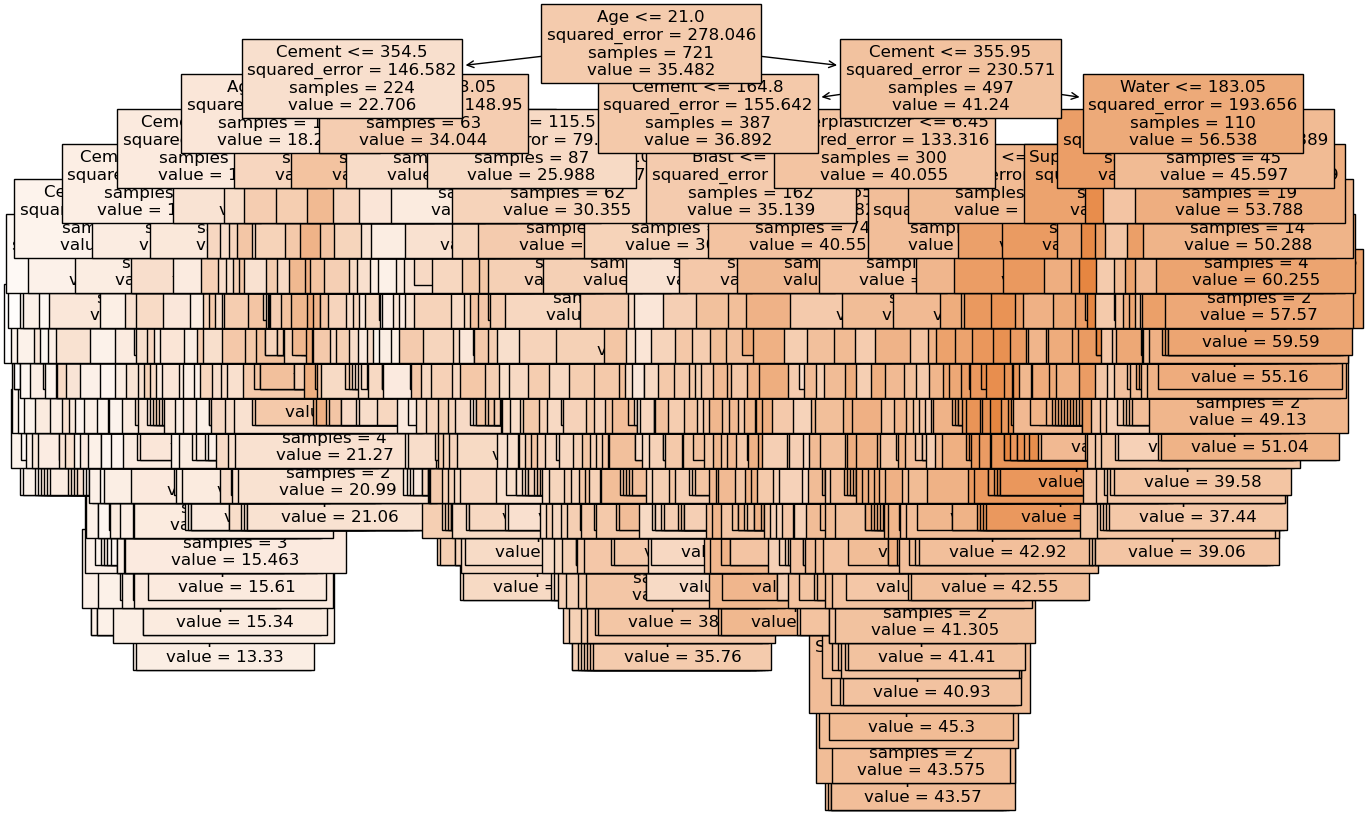

In [6]:
plt.figure(figsize=(15,10))
plot_tree(dtr, feature_names=X_train.columns, filled=True, fontsize=12)
plt.show()

In [7]:
kfold = KFold(n_splits=5, shuffle=True, random_state=23)
params = {'max_depth':[2,3,4,5,6,7,8,9,10,None]}
gcv = GridSearchCV(dtr, param_grid=params, cv=kfold, n_jobs=4)
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': None}
0.8423769153142352


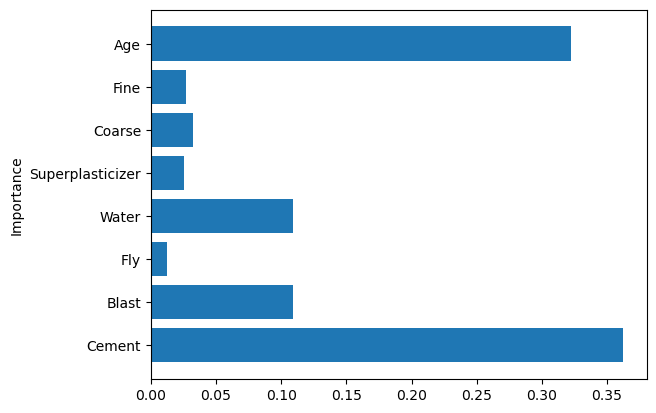

In [8]:
best_model = gcv.best_estimator_

df_imp = pd.DataFrame({'variable':best_model.feature_names_in_, 'importance':best_model.feature_importances_})
df_imp = df_imp[df_imp['importance']>0.0001]
df_imp.sort_values(by='importance',ascending=False)
plt.barh(df_imp['variable'],df_imp['importance'])
plt.ylabel('Importance')
plt.show()

In [10]:
params = {'max_depth':[2,3,4,5,6,7,8,9,10,None],'min_samples_split':[2,3,4,5,6,7,8,9,10],'min_samples_leaf':np.arange(1,16)}
gcv = GridSearchCV(dtr, param_grid=params, cv=kfold, n_jobs=4)
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.8498830549925976
